#  Electro-Acoustics

## Miniature-Speakers: Thiele-Small parameters determination. 

Stephane Dedieu, March 2023

These programs were developped for clients in a consulting practice, back in 2006-2009. <br> 
Initially all codes were open source Scilab scripts. <br>
We coded them "as is" in Python. 

### Thiele-Small Parameters

<span style="color:#4169E1"> "Thiele-Small parameters" refers to a set of electromechanical parameters defining how a speaker driver performs:<br>
<i>in the Thiele-Small model, the speaker is assumed to be a one degree of freedom damped system:  a mass, a  spring and a damper</i>. <br>
    
<span style="color:#4169E1"> The equivalent circuit is a RLC. In the impedance models: an inductance (L ~speaker cone/diaphragm mass), a capacitor C (1/C ~ speaker suspension stiffness) and a resistor (R ~damping). <br>
TS Parameters are determined through the analysis of the speaker impedance around its first resonance fr.

<span style="color:#4169E1"> Some of these parameters are: 

- <b>Sd</b>  		Area of the diaphragm (m2) . 
- <b>Mms</b> 		Mass of the diaphragm, including acoustic mass (free-air), in kilograms.
- <b>Vas</b>		Equivalent volume linked to the suspension stiffness (m3) 
- <b>Cms=Vas/ρc2</b> 	Compliance of speaker driver's suspension (m/N) (1/'stiffness') 

- <b>Rms</b> 		Mechanical resistance of the driver's suspension (kg/s) 
- <b>Le</b>  		Voice coil inductance  (mH). 
- <b>Re</b>  		DC resistance of the voice coil (Ohms). 
- <b>Bl</b> 		Force factor= [magnet field strength in the voice coil gap]x[length of wire in the magnetic field]  (T·m or N/A). 


<span style="color:#4169E1"> These parameters must be measured with small amplitude signals, when the cone excursion vs. voltage has a linear behavior. At higher power the speaker does not behave linearly for several reasons: suspension stiffness is non linear vs displacements, voice coil is partially outside the maximum magnetic flux area... 

<span style="color:#4169E1"> Several TS parameters extraction methods and set-ups exist:

- “constant current” high value resistor R >> Rdc of the speaker.
- “constant voltage” with a low value resistor R

<span style="color:#4169E1"> For extracting TS parameters, speaker impedance must be measured in two conditions:
- speaker in free-air
AND
- speaker coupled to an enclosure= delta compliance method (box volume known with accuracy) 
OR
- speaker with a small added mass= delta mass method (mass known with precision).

<span style="color:#4169E1"> <b>Note: </b> For micro-speakers in this Notebook, the delta compliance method is highly recommended for obvious reasons.


<span style="color:#4169E1"> The knowledge of a speaker driver Thiele-Small parameters allows the simulation and the design of optimal:

- loudspeakers having sealed or ported enclosures. The sound pressure is computed assuming that the speaker cone surface area (and port surface) behaves like a rigid piston. Acoustic radiation by the speaker is based on a "far-field" simplification of the Rayleigh integral for a rigid vibrating piston.

- receivers, earphones, ... provided that an electroacoustic model of the ear acoustic impedance is available.



<span style="color:#4169E1"> References:

[1] International Standard IEC 60268.5  “Sound system equipment: Part 5: Loudspeakers" <br>
[2] Determination of the Thiele - Small Parameters Using Two-Channel FFT Analysis, C. Struck, by Christopher J. Struck, Brüel & Kjaer Instruments Hoffman Estates, Illinois, Application Note based on a paper presented at the 82nd AES Convention London, England, 11th March, 1987.<br>
[3] R.H. Small, “Direct-Radiator Loudspeaker System Analysis”, J Audio Eng. Soc. Vol. 20, pp.383-395, June 1972. <br>
[4] Leo Beranek “Acoustics”, 1993 Edition

### Miniature speakers

<span style="color:#4169E1"> The following high quality micro-speakers were designed and manufactured by NXP Semiconductors in the late 2000s. Their applications were mainly: loudspeakers and receivers for smartphones. 

<img src="Micro_Speakers.png" width="800" height="400">

|       |Re [Ohm]| Bl [Tm]|Mms [kg]|Cms [m/N]|Rms [kg/s] |Sd [m^2]| SPL [dBSPL/W/m]|Fres [Hz]|Qms|Qes|Qts|Vas [m^3]|         
| ---   | ---    | ---    | ---    | ---     | ---       | ---    | ---            | ---     |---|---|---|---      |
|<b>Grace</b> |7.25|0.582|43.1 10<sup>-6</sup>| 648.3 10<sup>-6</sup>|46.7 10<sup>-3</sup>|  110.0 10<sup>-6</sup>  |74.41| 950.0 |5.48 |5.82|2.80|1.11 10<sup>-6</sup>|
| <b>11 x 15 mm</b> |7.53|0.836|74.8 10<sup>-6</sup>| 13.4 10<sup>-3</sup>|7.64 10<sup>-2</sup>|  115.0 10<sup>-6</sup>  |73.14| 449.0 |3.06 |0.64|0.53|3.11 10<sup>-6</sup>|
Test set-up| <b>Tiny</b> |7.11|0.411|33.0 10<sup>-6</sup>| 1.96 10<sup>-3</sup>|48.6 10<sup>-3</sup>|  65.0 10<sup>-6</sup>  |69.3| 630.0 |2.69 |5.48|1.80|1.17 10<sup>-6</sup>|

### Test Set-up


<span style="color:#4169E1"> The test set-up is similar to Christopher Struck [2]  <br>
 
<span style="color:#4169E1"> In this case a M-Audio sound card was used. The two input channels "recorded" voltage at the generator and at the speaker: Vg and Vs. <br> 
Since it was difficult to get sufficient amplitude for Vs, the big 1 kOhms test resistor R was replaced with a smaller resistor: R= 150 Ohms. <br> 
The constant current hypothesis may somewhat hold, because the final result is pretty decent compared with data from the manufacturer.    

<span style="color:#4169E1"> The speaker was driven with a white noise. 20Hz-20kHz. 

 


| <img src="TS_ComplianceBox.png" width="250">     |   <img src="TS_setup_struck.png" width="500"> |
| --- | ---  |
| <center>Speaker "Grace" and a 4-cc delta compliance box</center>    | <center>Test Set-up [2]</center>     |

<span style="color:#4169E1"> Based on the set-up above, the speaker impedance Z is given by:

$$Z= R \frac{Vs}{Vg}$$



<span style="color:#4169E1"> We will compute the complex transfer function. We will display the phase. Parameters are extracted from the speaker impedance magnitude.


<span style="color:#4169E1">We apply a delta compliance method, the speaker is measured:
- (1) in free air
- (2) coupled to a small 4cc enclosure
    
    
<span style="color:#4169E1"> Note: Speaker impedance Z depends on the voltage ratio, as measured by the two channels of the sound card or DAQ. The two DAQ or Sound Card input channels must have the same gain and no interchannel delay. In this case both sound card channels (Left, Right) were tested and matched.    

In [3]:
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

<span style="color:#4169E1"> There are options in Python, Scipy, but like in the initial Scilab script, we define a function for computing Transfer Functions and Magnitude-Squared Coherence (which will be not used in this notebook). 

In [22]:
from scipy import signal
from skimage import util
import scipy.signal

# Fonction FFT spectrum. Optimum results when we 

def TF_FFT(xx,yy, NFFT, st, win,fs) :  #, spec_filter):
    #-------------------------
    # xx,yy are extracted from a stereo recording. They have the same LENGTH 
    #-------------------------
    frames_xx = util.view_as_windows(xx, window_shape=(NFFT,), step=st)
    frames_yy = util.view_as_windows(yy, window_shape=(NFFT,), step=st)
    # AVERAGING on full length DNA sequences
    frames_xx=frames_xx*win #  WINDOWING + FILTERING
    frames_yy=frames_yy*win #  WINDOWING + FILTERING
    X  = np.fft.fft(frames_xx)   # COMPLEX DOUBLE SIDED spectrum !!
    Y  = np.fft.fft(frames_yy)   # COMPLEX DOUBLE SIDED spectrum !!     
    #---- PSDxx, PSDxy must be averaged summed on all frames !  We can sum because we compute a ratio !   
    PSD_xx= np.mean(np.abs(X)**2, axis=0)[0:NFFT//2]
    PSD_yy= np.mean(np.abs(Y)**2, axis=0)[0:NFFT//2]
    PSD_xy= np.mean(Y*np.conj(X), axis=0)[0:NFFT//2]
    # Coherent averaging
    TF= PSD_xy/PSD_xx
    COH_xy = (np.abs(PSD_xy)**2)/(PSD_xx*PSD_yy);  #Magnitude-Squared Coherence (Not used here)
    #--------------------
    xfreq= np.arange(0, NFFT//2, 1, dtype=int)
    xfreq=xfreq*fs/NFFT
    return TF, xfreq

In [23]:
import librosa 

In [16]:
#===============================
# Importing Measurements (.wav  or .txt   TWO CHANNELS per recording)
#============================================
speakername="Grace - 8 Ohms";
#--------
XFF,Fs =  librosa.load("GRACE_FA150OHMS.wav", sr=44100, mono=False)
XBOX,Fs = librosa.load("GRACE_BOX150OHMS.wav", sr=44100, mono=False) # sample 44.1 kHz 
#----------------------------------------------------------------------------- 
x=XFF[0,:];        y=XFF[1,:]          # Speaker in free air
xx= x;

xb=XBOX[0,:];      yb=XBOX[1,:]        # Speaker coupled with box enclosure, volume Vb
xxb= xb;

#========================================================================
#    Transfer functions  Y/(X -Y)  and Yb/(Xb-Yb)  ---->   impedance Z  and   ZBOX
#========================================================================
NFFT=1024*8
st=NFFT//8
win = np.hanning(NFFT + 1)[:-1]  # window for each frame 
#-- For extracting the phase ! 
Zff, afreq = TF_FFT(x,y, NFFT, st, win,Fs);                  # Impedance Zff speaker in free field  (transferF function) 
Zbox,afreq = TF_FFT(xb,yb, NFFT, st, win,Fs);                # Impedance Zbox speaker coupled to the BOX (volume Vb) (transferF function)  
#--------------------------------------------------        
#  We will extract all parameters from Speaker Impedance MAGNITUDE
#  Z= RR* Y/(X-Y) 
#  Z  speaker in free air
#  Zbox speaker + box 
#--------------------------------------------------
Z =RR*np.abs(Zff)
ZB=RR*np.abs(Zbox)

<b> We plot the impedance v. frequency: Speaker in free air. Speaker in box.   </b>

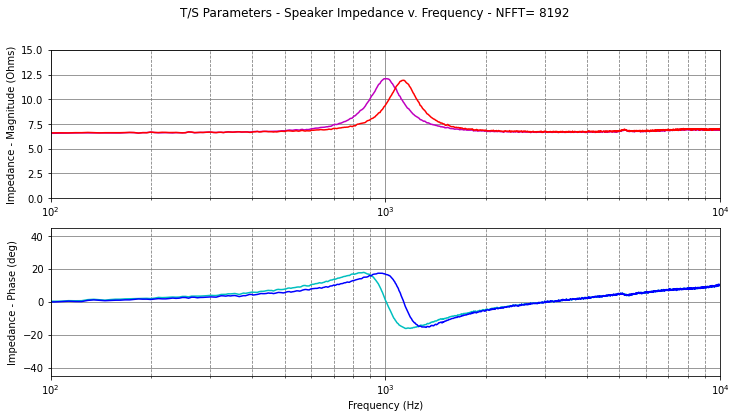

In [17]:
fig, axs = plt.subplots(2, figsize=(12,6))
fig.suptitle("T/S Parameters - Speaker Impedance v. Frequency - NFFT= "+str(NFFT))
#  FFT Magnitude - HIGH-Pass 
#axs[0].plot(xx,np.abs(spectrum_F[j]),color=(j/7, 0., 0.5), linewidth=0.5)
axs[0].semilogx(afreq,Z,color='m')
axs[0].semilogx(afreq,ZB,color='r')
        #  FFT phase
axs[1].semilogx(afreq,(180/np.pi)*np.unwrap(np.angle(Zff)),color='c')
axs[1].semilogx(afreq,(180/np.pi)*np.unwrap(np.angle(Zbox)),color='b')
#--------------------------
#axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Impedance - Magnitude (Ohms)")
axs[0].set_xlim(100, 10000)
axs[0].set_ylim(0, 15)
axs[0].grid(b=True, which='major', color='grey', linestyle='-')
axs[0].grid(b=True, which='minor', color='grey', linestyle='--')
#-----------------------------------------------------------------
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Impedance - Phase (deg)")
axs[1].set_xlim(100, 10000)
axs[1].set_ylim(-45, 45)
axs[1].grid(b=True, which='major', color='grey', linestyle='-')
axs[1].grid(b=True, which='minor', color='grey', linestyle='--')
plt.show()

In [18]:
#=====================================================================================================    
#   Zmax  and Zboxmax are searched in [afrmin, afrmax] = [0,2000] Hz
#------------------------------------------------------
#   Interval for elimination of erroneous low frequency measurements error 0-2.5 Hz (up to 10 Hz if necessary)  
#   Only for determination of Zmax, Zmaxbox frequencies
#-------------------------------------------------------
afrmax=2000;            # Hz
afrmin=100;             # Hz  
#------------     
ifremax = np.argmin(abs(afreq-afrmax)) # index of max frequency 
ifremin = np.argmin(abs(afreq-afrmin)) # index of min frequency
#============
#
#====================== index of resonance frequnecies in [afrmin,afrmax] 
ifr = np.argmax(Z[ifremin:ifremax]);  # index of Zmax in [afrmin,afrmax] 
ifb = np.argmax(ZB[ifremin:ifremax])  # index of Zmaxbox in [afrmin,afrmax] 
#======================
Zmax=Z[ifremin+ifr]
Zmaxbox=ZB[ifremin+ifb]
#======================
fr = afreq[ifremin+ifr]        # Resonance frequency speaker in FREE AIR 
fb = afreq[ifremin+ifb]        # Resonance frequency speaker coupled to the box 
#--- phase should be 0 at both frequencies
#Phase(ifremin+ifr);
#PhaseB(ifremin+ifb);
#=======================
# Frequency at Zmax-3 dB   
#======================= 
Zeff=Zmax*np.sqrt(2)/2;           # effective impedance
Zeffbox=Zmaxbox*np.sqrt(2)/2;     # Impedance Zeff box   
#----- Detecting frequency of both efficient values.  Speaker free-air
ZEFF=  np.abs(Z-Zeff)
feff1= np.argmin(ZEFF[ifremin:ifremin+ifr]) 
feff2= np.argmin(ZEFF[ifremin+ifr:ifremax])

#----- Detecting frequency of both efficient values. Speaker in box
ZEFFBOX=  np.abs(ZB-Zeffbox)
feff1box= np.argmin(ZEFFBOX[ifremin:ifremin+ifb]) 
feff2box= np.argmin(ZEFFBOX[ifremin+ifb:ifremax])
#
f1 = afreq[feff1+ifremin];     f2 = afreq[feff2+ifremin+ifr];             #  f1  f2  frequencies at Zeff
f1b = afreq[feff1box+ifremin]; f2b = afreq[feff2box+ifremin+ifb];         #  f1  f2  frequencies at Zeffbox

f1,f2=sorted([f1,f2])
f1b,f2b=sorted([f1b,f2b])


frbis = np.sqrt(f1*f2)                         #  Sanity Check frbis = fr  initial (free field)
frbisb= np.sqrt(f1b*f2b)                              

In [19]:
#================================================ 
r0 = Zmax/Rdc          # normalized impedance 
r0b = Zmaxbox/Rdc      # normalized impedance 
#----- 
r1 = np.sqrt(r0);      r1b = np.sqrt(r0b);  
#
#-----------------------                Q  speaker in free air
#QTS=(1/r0)*(frbis/(f2-f1))*np.sqrt((r0**2-r1**2)/(r1**2-1));      #use of frbis=np.sqrt(f1*f2) instead of fr 
QTS=(1/r0)*(fr/(f2-f1))*np.sqrt((r0**2-r1**2)/(r1**2-1));          #use of frbis=np.sqrt(f1*f2) instead of fr 
#
QMS=np.sqrt(  (r0**2-r1**2)/(r1**2-1)) * fr/(f2-f1);
QMS2=np.sqrt(  (r0**2-r1**2)/(r1**2-1)) * frbis/(f2-f1);           #Sanity check 

#QMS=frbis*np.sqrt(r0)/(f2-f1);

#QMSbis=frbis*np.sqrt(r0)/(f2-f1);       # valid only if r1 is chosen as np.sqrt(r0)
QES=QMS/(r0-1)
QES2=QMS*QTS/(QMS-QTS)    # Sanity check
#-----------------------               Q speaker in box enclosure
#QTSbox=(1/r0b)*(frbisb/(f2b-f1b))*np.sqrt((r0b**2-r1b**2)/(r1b**2-1)); 
QTSbox=(1/r0b)*(fb/(f2b-f1b))*np.sqrt((r0b**2-r1b**2)/(r1b**2-1)); 
#
QMSbox=np.sqrt(  (r0b**2-r1b**2)/(r1b**2-1)) * fb/(f2b-f1b);

QMSbox=frbisb*np.sqrt(r0b)/(f2b-f1b);     # Corrige 25/05/2008

QESbox=QMSbox/(r0b-1);                    # Corrige 25/05/2008
#QESbox=QMSbox*QTSbox/(QMSbox-QTSbox) ;   # Sanity check

#================================================== Vas based on Vbox measurement ================
Vas = Vb*((fb/fr)**2-1)         ;                # Equivalent volume m3 (linked to suspension Stiffness)
#Vasb= Vb*(fb*QESbox/(fr*QES)-1)  ;                #  
#Vas=Vasb;
#================================================ Mechanical Parameters   (Acoustical Parameters Ka,Ma,Ra = Mechanical Parameters Km,Mm,Rm / Sd**2)
Cas = Vas/(ro*cel**2);                           #  Cone Suspension Compliance  (acoustical parameter)
Cms = Cas/(Sd**2);                                 #  Cone Suspension Compliance  (mechanical parameter) 
K = 1/Cms;                                        #  Cone Suspension Stiffness   N.m (mech.)
Mms = K/((2*np.pi*fr)**2);                           #  Cone Mass   kg    (mech.)
#----
Rmbis = 1/(2*np.pi*fr*Cms*QMS);                     #  
Rm = (2*np.pi*fr*Mms)/QMS;                          #  Damping     kg/s   (mech.)   (Rmsma==Rm)
Bl = np.sqrt(2*np.pi*fr*Rdc*Mms/QES);                  #  Conversion Factor: current/force   T.m.  (mech)

Le=Bl**2*Cms;
#----
Znom = 1.15*Rdc  ;                                #
Nodriver = 4*(np.pi**2)*(fr**3)*Vas/((cel**3)*QES);    # Speaker Efficiency (%) 
NodriverBIS=ro*Bl**2*Sd**2/(2*np.pi*cel*Rdc*Mms**2);            # from A  Ludwig  idem from previous 
#----
Sp=112.2 + 10*np.log10(NodriverBIS)  ; 
EBP = fr/QES;                                    # Driver Efficiency Band-width Product (EBP)   EBP<50 Sealed Enclosure
#-----------------------------------------------# Driver Efficiency Band-width Product (EBP)   EBP>50 Ported Enclosure

In [20]:
fr_='{:.2f}'.format(fr)
fb_='{:.2f}'.format(fb)
Vas_cc='{:.2f}'.format(Vas*1e6)
Cms_= '{:.2e}'.format(Cms)
Mms_= '{:.2e}'.format(Mms)
Bl_='{:.3f}'.format(Bl)
QMS_='{:.2f}'.format(QMS)
QES_='{:.2f}'.format(QES)
QTS_='{:.2f}'.format(QTS)
Sd_='{:.2f}'.format(Sd*1e4)
Rm_='{:.3f}'.format(Rm)
Rdc_='{:.2f}'.format(Rdc)
Le_='{:.3f}'.format(Le*1e3)
EBP_='{:.2f}'.format(EBP)
No_='{:.3f}'.format(100*Nodriver)
Sp_='{:.2f}'.format(Sp)

In [21]:
import pandas as pd
Styles = [dict(selector = "caption", 
               props = [("color", "black"), 
                        ("text-align", "center")])]

table = [['$f_0$', fr_ , 950, 'Hz'],
#          ['$f_{box}$', fb_, 'na', 'Hz'],
          ['Vas', Vas_cc, 1.11, 'cm3'],
          ['Cms', Cms_, 6.48e-04, 'm/N'],
          ['Mms', Mms_, 4.31e-05, 'kg'], 
          ['Bl', Bl_, 0.582,  'T.m'],
          ['QMS', QMS_, 5.48, ' '],
          ['QES', QES_, 5.82, ' '],
          ['QTS', QTS_, 2.48, ' '],
          ['Sd', Sd_, 1.1, 'cm2'],
          ['Rm', Rm_, 0.047,  'kg/s'],
          ['Rdc', Rdc_, 7.25,  'Ohm'],   
 #         ['Le', Le_, 'na', 'mH'] ,
          #['EBP', Le_, '  '] 
 #         ['No', No_, 'na', '%'], 
          ['SPL', Sp_, 74.41, 'dB/W/1m'] ]

df = pd.DataFrame(table, columns = ['TS Parameter', 'Measured Value', 'Manufacturer','Unit'])

df['Measured Value']= df['Measured Value'].astype(float)
df['Manufacturer']=   df['Manufacturer'].astype(float)
df["Error (%)"] = 100*abs(df['Measured Value'] - df['Manufacturer']) / df['Manufacturer']

df= df.style.set_caption('<b>Thiele-Small Parameters</b>\n'+speakername)
df

,TS Parameter,Measured Value,Manufacturer,Unit,Error (%)
0,$f_0$,1006.680000,950.000000,Hz,5.966316
1,Vas,1.090000,1.110000,cm3,1.801802
2,Cms,0.000646,0.000648,m/N,0.308642
3,Mms,0.000039,0.000043,kg,10.208817
4,Bl,0.583000,0.582000,T.m,0.171821
5,QMS,3.360000,5.480000,,38.686131
6,QES,5.350000,5.820000,,8.075601
7,QTS,2.060000,2.480000,,16.935484
8,Sd,1.100000,1.100000,cm2,0.000000
9,Rm,0.073000,0.047000,kg/s,55.319149


### Conclusions

Overall results are very good. <br>
The only issue is with QMS. The mechanical quality factor is a bit low. It impacts QES, QTS and above all Rm, linked to speaker mechanical damping. <br> 
We tested one speaker only. In general manufacturers test many of them and average the parameters. It could be due to a too large input signal.   